<h1 style="text-align: center;">Desafío - Estimando curvas de densidad de probabilidad</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío: Individual.
Para la realización del desafío necesitarás apoyarte del archivo <a href="https://empieza.desafiolatam.com/cohorts/2091/sections/78278/activities/119107/items/610854">Apoyo Desafío - Pruebas de hipótesis</a>.

## Habilidades a evaluar
- Identificar la estandarización de variables mediante el cálculo de puntajes $z$.
- Conocer la distribución $t$ de Student y su aplicación.
- Aplicar pruebas de hipótesis simples en el contexto de la inferencia.

## Descripción
A partir del trabajo realizado en el Desafío anterior, la empresa para la cual trabajas, te ha solicitado continuar el análisis de datos pero, está vez, evaluando juicios de hipótesis e implementando funciones que faciliten el análisis de datos. Para ello, te entregan un material de apoyo el cual deberá servir como base para desarrollar los siguientes requerimientos.

## Requerimientos
A continuación revisaremos los requerimientos y acciones que la empresa a la cual postulas te pide realizar.

### 1. Evaluar juicios de hipótesis (2 puntos): 
Para evaluar la pertinencia de diversas hipótesis, se te solicita discernir si es posible rechazar la hipótesis nula.

- 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era medir actitudes frente a la adopción homoparental. La organización encargada de procesar los datos obtuvo los siguientes resultados:
>El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental ($p_{\text{heterosexuales}}$), mientras que un 72% de los encuestados por activistas que se identificaron como homosexuales se mostraron a favor de la adopción homoparental ($p_{\text{homosexuales}}$).
    
- Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.
$$
H_0: p_{\text{heterosexuales}} = p_{\text{homosexuales}} \\
H_1: p_{\text{heterosexuales}} \neq p_{\text{homosexuales}}
$$

- Con _p-valor_ de 0.1183 ¿es posible rechazar la hipótesis nula en favor de la alternativa con una confianza de 95%?

**Respuesta: <font color='blue'>No, no es posible rechazar la hipotesis nula con ese _p-valor_ para una confienza de 95% ya que para rechazar se necesita tener un _p-valor_ menos a 0.05, es decir, no existe evidencia suficiente para rechazar que ambos porcentajes son diferentes.</font>**

- ¿Cuanta es la confianza máxima con la que sería posible rechazar la hipótesis nula en favor de la alternativa con estos resultados?

**Respuesta: <font color='blue'>La confianza maxima para rechazar sería de un 88,17%</font>**

### 2. Importar la base de datos utilizada la sesión presencial anterior (2 puntos):
- Agregue una serie de variables binarias por cada continente de la variable region. _**Tip**_: Utilice np.where para ello.
- De manera similar a la sesión anterior, enfóquese en las siguientes variables:
    - **Apellidos desde la A hasta la N**: Enfocarse en las variables `chldmort`, `adfert` y `life`.
    - **Apellidos desde la N hasta la Z**: Enfocarse en las variables `femlab`, `literacy` y `school`.

In [62]:
# Utiliza esta celda par importar los módulos necesarios y el set de datos. Recuerda el encoding!
import pandas as pd
import numpy as np

df = pd.read_csv('nations.csv', encoding='iso-8859-1', index_col='Unnamed: 0')

In [63]:
# Utiliza esta celda para crear una variable binaria para cada continente (1: Pertenece al contiente, 0: No pertenece al continente)
# Esto añadirá 5 columnas a tu dataframe

regiones = ['Africa', 'Asia','Europe','Americas','Oceania']

for name in regiones:
    df[name] = np.where(df['region'] == name,1,0)

columns_apellido = ['chldmort', 'adfert','life']

df_subset = df[columns_apellido + regiones]
df_subset

,chldmort,adfert,life,Africa,Asia,Europe,Americas,Oceania
1,34.75,7.300000,72.316666,1,0,0,0,0
2,122.75,111.699997,54.733334,1,0,0,0,0
3,60.25,52.099998,52.250000,1,0,0,0,0
4,170.50,124.800003,53.783333,1,0,0,0,0
5,168.50,18.600000,48.866665,1,0,0,0,0
...,...,...,...,...,...,...,...,...
190,26.75,28.299999,71.533333,0,0,0,0,1
191,36.00,70.300003,66.500000,0,0,0,0,1
192,19.25,22.299999,71.833336,0,0,0,0,1
193,36.50,23.299999,66.033333,0,0,0,0,1


### 3. Implementar una función de prueba de hipótesis a mano (3 puntos):
- La función debe ingresar los siguientes argumentos:
    - `data`: La tabla de datos.
    - `variable`: La variable a analizar.
    - `binarize`: El indicador binario a utilizar.
    
_**Tip**_:
- Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con `dropna()`.
- Implemente `ttest_ind` de `scipy.stats` y guarde el valor $t$ y _p-value_.
- Reporte las medias para cada grupo (0 y 1).
- Reporte la diferencia de entre las medias.
- Reporte los valores $t$ y _p-value_.

In [164]:
# Utiliza esta celda para definir la función
from scipy.stats import ttest_ind

def test_hipotesis(data, variable, binarize):
    """
        Objetivo:
            - Realizar el test de hipotesis para una variable cuantitativa, entregando el valor del estadistico y el p-value correspondiente
        Parámetros:
            - data (dataframe): Dataframe donde se encuentra las variables a utilizar
            - variable (serie): nombre de la variable cuantitativa a la cual se le hará el test
            - binarize (serie): nombre de la variable que es un indicador de como separar los datos (debe ser 1 o 0) 

        Retorno:
           - print con los resultados del test
    """

    group_1 = data[data[binarize] == 1][variable].dropna()
    group_2 = data[data[binarize] == 0][variable].dropna()

    mean_group1 = group_1.mean()
    mean_group2 = group_2.mean()
    diff = mean_group1 - mean_group2

    t_obs, p_value = ttest_ind(group_1, group_2) #Dado que no podemos asumir que la varianza poblacional es la misma para cada grupo, dejamos como equal_var como Falso

    print(f'Media del grupo 1: {mean_group1:.2f} \nMedia del grupo 2: {mean_group2:.2f} \nDiferencia entre medias: {diff:.2f} \nValor del estadistico t: {t_obs:.2f} \np-value: {p_value:.5f}')


In [165]:
# Utiliza esta celda para hacer 1 llamado de prueba de la función implementada

test_hipotesis(df_subset, 'chldmort', 'Africa')

Media del grupo 1: 109.75 
Media del grupo 2: 24.75 
Diferencia entre medias: 85.00 
Valor del estadistico t: 14.17 
p-value: 0.00000


### 4. Implementar una función que grafique los histogramas para ambas muestras (3 puntos)
- Genere una función que devuelva un gráfico donde visualice los dos histogramas cuando la variable es 1 y 0, respectivamente. _**Tip**_: Refactorize la función incluyendo el método `hist` de `matplotlib.pyplot`. Incluya los argumentos `alpha` y `label`.
- Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y posteriormente grafique.
- Concluya con los principales resultados al respecto.

In [168]:
# Utiliza esta celda para refactorizar la función implementada en el punto 3
import matplotlib.pyplot as plt

def test_hipotesis_hist(data, variable, binarize):
    """
        Objetivo:
            - Realizar el test de hipotesis para una variable cuantitativa, entregando el valor del estadistico y el p-value correspondiente, ademas del histograma correspondiente para visualizar mejor los resultados
        Parámetros:
            - data (dataframe): Dataframe donde se encuentra las variables a utilizar
            - variable (serie): nombre de la variable cuantitativa a la cual se le hará el test
            - binarize (serie): nombre de la variable que es un indicador de como separar los datos (debe ser 1 o 0) 

        Retorno:
           - print con los resultados del test y el histograma de cada grupo
    """

    group_1 = data[data[binarize] == 1][variable].dropna()
    group_2 = data[data[binarize] == 0][variable].dropna()

    mean_group1 = group_1.mean()
    mean_group2 = group_2.mean()
    diff = mean_group1 - mean_group2

    t_obs, p_value = ttest_ind(group_1, group_2, equal_var=False) #Dado que no podemos asumir que la varianza poblacional es la misma para cada grupo, dejamos como equal_var como Falso

    diccionary = {1: group_1,      #Definimos un diccionario para poder recorrer despues en el iterador
                  2: group_2}
    
    plt.figure(figsize=(10,5))
    for i in range(1,3):    #iteramos para realizar cada gráfico
        plt.subplot(1, 2, i)
        plt.hist(diccionary[i], alpha=.6, color='lightgrey')
        plt.axvline(np.mean(diccionary[i]))
        plt.title(f'{variable} {"<=" if i==1 else ">"} {data[variable].mean():.2f}')
    plt.show()

    print(f'Media del grupo 1: {mean_group1:.2f} \nMedia del grupo 2: {mean_group2:.2f} \nDiferencia entre medias: {diff:.2f} \nValor del estadistico t: {t_obs:.2f} \np-value: {p_value:.5f}')

<hr>
AFRICA
<hr>

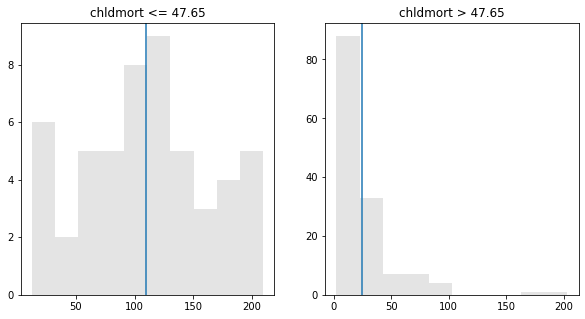

Media del grupo 1: 109.75 
Media del grupo 2: 24.75 
Diferencia entre medias: 85.00 
Valor del estadistico t: 10.83 
p-value: 0.00000


In [169]:
# Utiliza esta celda para realizar el llamado a la función para África y la primera variable

test_hipotesis_hist(df_subset, 'chldmort', 'Africa')

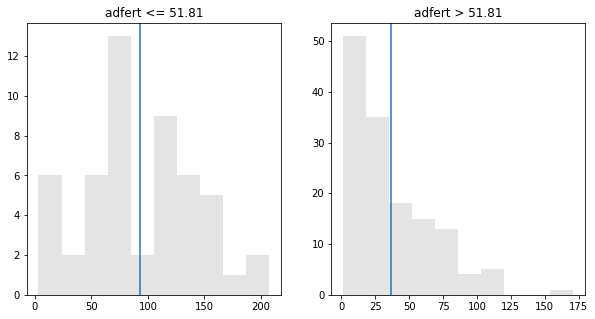

Media del grupo 1: 92.72 
Media del grupo 2: 36.83 
Diferencia entre medias: 55.89 
Valor del estadistico t: 7.55 
p-value: 0.00000


In [170]:
# Utiliza esta celda para realizar el llamado a la función para África y la segunda variable

test_hipotesis_hist(df_subset, 'adfert', 'Africa')

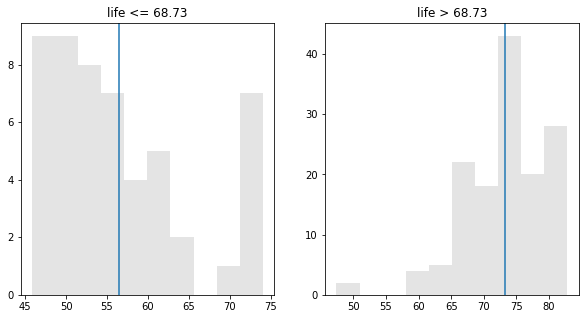

Media del grupo 1: 56.49 
Media del grupo 2: 73.21 
Diferencia entre medias: -16.72 
Valor del estadistico t: -12.96 
p-value: 0.00000


In [171]:
# Utiliza esta celda para realizar el llamado a la función para África y la tercera variable

test_hipotesis_hist(df_subset, 'life', 'Africa')

**Comentarios**

**<font color='blue'>Claramente, se ve una diferencia entre el promedio de cada grupo reflejado en los histogramas; ademas, el test de hipotesis nos arrojo en todos los casos un p-valor de practicamente 0, por lo que hay evidencia suficiente para rechazar la hipotesis nula, es decir, `existe evidencia suficiente para decir que las medias de cada una de las variables para Africa es diferente para las demas regiones.`</font>**

<hr>
ASIA
<hr>

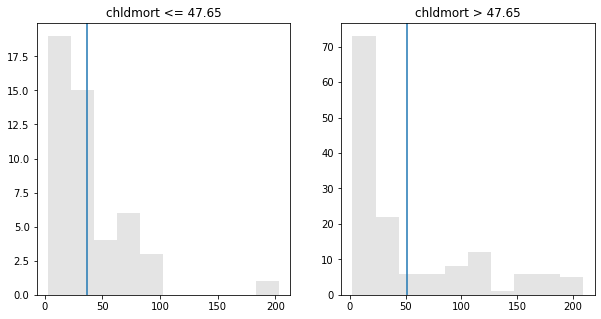

Media del grupo 1: 37.10 
Media del grupo 2: 51.14 
Diferencia entre medias: -14.04 
Valor del estadistico t: -2.03 
p-value: 0.04408


In [152]:
# Utiliza esta celda para realizar el llamado a la función para Asia y la primera variable

test_hipotesis_hist(df_subset, 'chldmort', 'Asia')

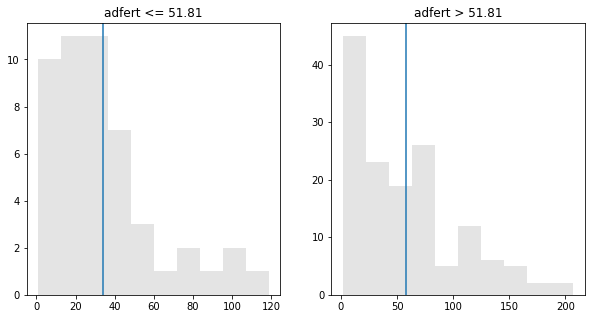

Media del grupo 1: 33.87 
Media del grupo 2: 57.88 
Diferencia entre medias: -24.01 
Valor del estadistico t: -4.32 
p-value: 0.00003


In [153]:
# Utiliza esta celda para realizar el llamado a la función para Asia y la segunda variable

test_hipotesis_hist(df_subset, 'adfert', 'Asia')

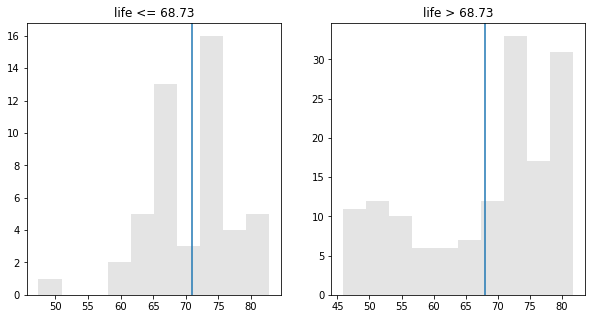

Media del grupo 1: 70.87 
Media del grupo 2: 68.01 
Diferencia entre medias: 2.87 
Valor del estadistico t: 2.21 
p-value: 0.02848


In [154]:
# Utiliza esta celda para realizar el llamado a la función para Asia y la tercera variable

test_hipotesis_hist(df_subset, 'life', 'Asia')

**Comentarios**

**<font color='blue'>`Para las siguientes respuestas, nos basaremos en un nivel de confienza del 95%.`**

**<font color='blue'>Segun los resultados del test, cada uno de los p-valores arrojados son menores a 0.05, por lo que hay evidencia suficiente para rechazar la hipotesis nula, es decir, `existe evidencia suficiente para decir que las medias de cada una de las variables para Asia es diferente para las demas regiones.`</font>**

**Como nota, vemos que para la variable `life` en el histograma, el valor de las medias para cada grupo es practicamente la misma, siendo un poco contradictorio con el resultado del test, pero esto puede ser ocacionado por la variabilidad de los datos que hizo que el test rezharaza la hipotesis nula con una confianza del 95%**

<hr>
AMERICAS
<hr>

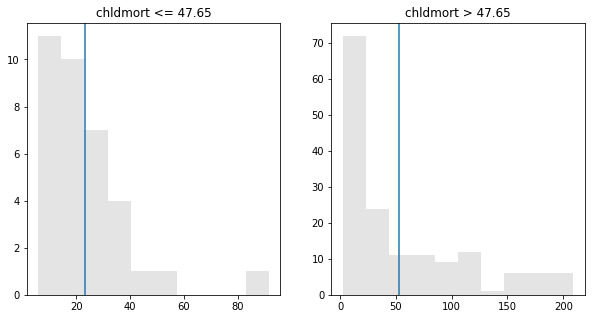

Media del grupo 1: 23.26 
Media del grupo 2: 53.05 
Diferencia entre medias: -29.79 
Valor del estadistico t: -5.67 
p-value: 0.00000


In [184]:
# Utiliza esta celda para realizar el llamado a la función para Américas y la primera variable

test_hipotesis_hist(df_subset, 'chldmort', 'Americas')

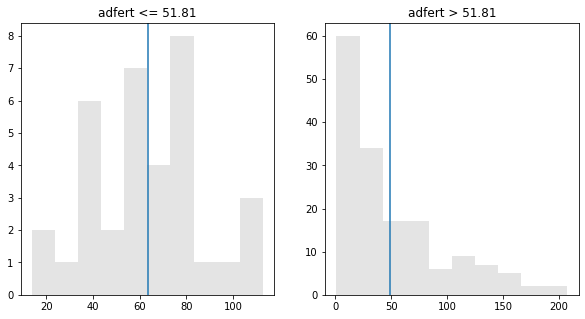

Media del grupo 1: 63.66 
Media del grupo 2: 49.21 
Diferencia entre medias: 14.45 
Valor del estadistico t: 2.62 
p-value: 0.01003


In [185]:
# Utiliza esta celda para realizar el llamado a la función para Américas y la segunda variable

test_hipotesis_hist(df_subset, 'adfert', 'Americas')

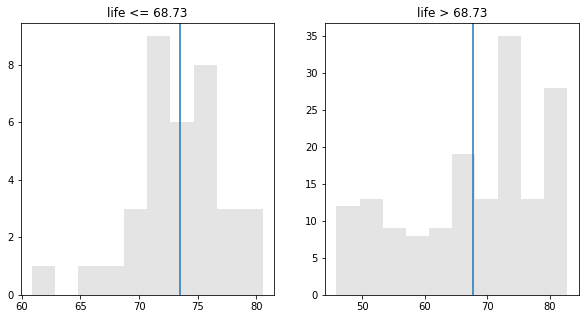

Media del grupo 1: 73.45 
Media del grupo 2: 67.69 
Diferencia entre medias: 5.76 
Valor del estadistico t: 5.37 
p-value: 0.00000


In [186]:
# Utiliza esta celda para realizar el llamado a la función para Américas y la tercera variable

test_hipotesis_hist(df_subset, 'life', 'Americas')

**Comentarios**

**<font color='blue'>`Para las siguientes respuestas, nos basaremos en un nivel de confienza del 95%.`**

**<font color='blue'>Claramente, se ve una diferencia entre el promedio de cada grupo reflejado en los histogramas salvo para la variable `life` donde se ven promedios mas o menos cernanos; pero, el test de hipotesis nos arrojo en todos los casos un p-valor de practicamente 0, por lo que hay evidencia suficiente para rechazar la hipotesis nula, es decir, `existe evidencia suficiente para decir que las medias de cada una de las variables para Americas es diferente para las demas regiones.`</font>**

<hr>
EUROPA
<hr>

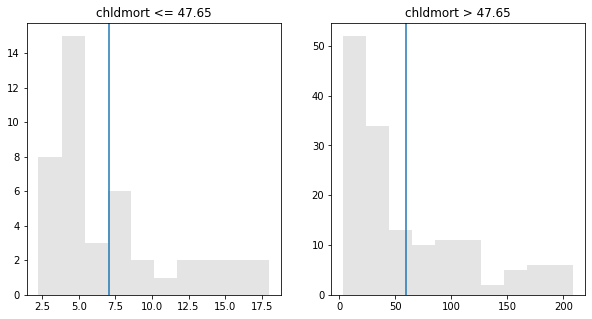

Media del grupo 1: 7.05 
Media del grupo 2: 59.29 
Diferencia entre medias: -52.24 
Valor del estadistico t: -11.60 
p-value: 0.00000


In [181]:
# Utiliza esta celda para realizar el llamado a la función para Europa y la primera variable

test_hipotesis_hist(df_subset, 'chldmort', 'Europe')

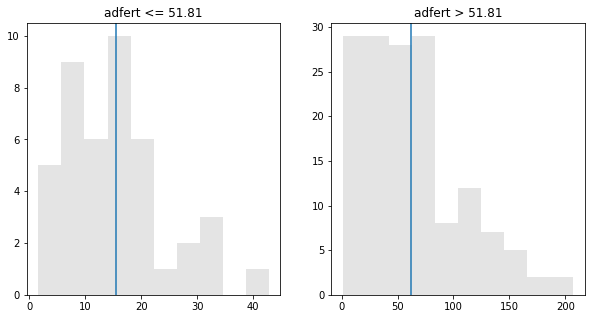

Media del grupo 1: 15.54 
Media del grupo 2: 62.15 
Diferencia entre medias: -46.61 
Valor del estadistico t: -11.96 
p-value: 0.00000


In [182]:
# Utiliza esta celda para realizar el llamado a la función para Europa y la segunda variable

test_hipotesis_hist(df_subset, 'adfert', 'Europe')

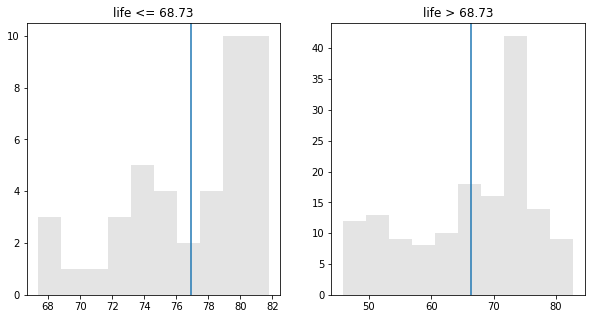

Media del grupo 1: 76.95 
Media del grupo 2: 66.39 
Diferencia entre medias: 10.56 
Valor del estadistico t: 10.29 
p-value: 0.00000


In [183]:
# Utiliza esta celda para realizar el llamado a la función para Europa y la tercera variable

test_hipotesis_hist(df_subset, 'life', 'Europe')

**Comentarios**

**<font color='blue'>Claramente, se ve una diferencia entre el promedio de cada grupo reflejado en los histogramas salvo para la variable `life` donde se ven promedios mas o menos cernanos; pero, el test de hipotesis nos arrojo en todos los casos un p-valor de practicamente 0, por lo que hay evidencia suficiente para rechazar la hipotesis nula, es decir, `existe evidencia suficiente para decir que las medias de cada una de las variables para Europa es diferente para las demas regiones.`</font>**

<hr>
OCEANIA
<hr>

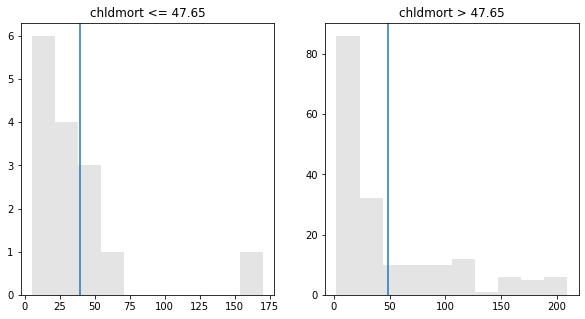

Media del grupo 1: 39.42 
Media del grupo 2: 48.34 
Diferencia entre medias: -8.93 
Valor del estadistico t: -0.80 
p-value: 0.43174


In [172]:
# Utiliza esta celda para realizar el llamado a la función para Oceanía y la primera variable

test_hipotesis_hist(df_subset, 'chldmort', 'Oceania')

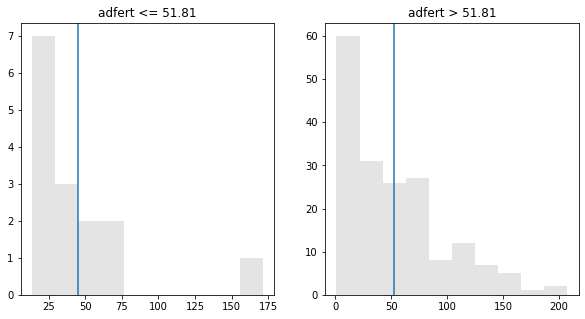

Media del grupo 1: 44.99 
Media del grupo 2: 52.39 
Diferencia entre medias: -7.39 
Valor del estadistico t: -0.69 
p-value: 0.49708


In [173]:
# Utiliza esta celda para realizar el llamado a la función para Oceanía y la segunda variable

test_hipotesis_hist(df_subset, 'adfert', 'Oceania')

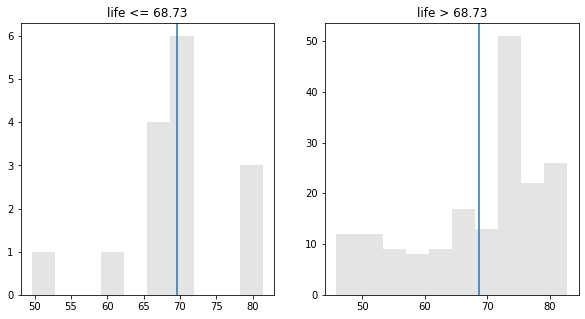

Media del grupo 1: 69.58 
Media del grupo 2: 68.66 
Diferencia entre medias: 0.93 
Valor del estadistico t: 0.43 
p-value: 0.67211


In [174]:
# Utiliza esta celda para realizar el llamado a la función para Oceanía y la tercera variable

test_hipotesis_hist(df_subset, 'life', 'Oceania')

**Comentarios**

**<font color='blue'>Claramente, no se ve una diferencia entre el promedio de cada grupo reflejado en los histogramas; ademas, el test de hipotesis nos arrojo en todos los casos un p-valor muy elevado, por lo que no hay evidencia suficiente para rechazar la hipotesis nula, es decir, `no existe evidencia suficiente que nos indique que las medias de cada una de las variables para Oceania sea diferente de las demas regiones.`</font>**